In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%load_ext autoreload
%autoreload 2

This will be a playground for exploring sklearn's Decision Tree Classifier.

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_petal_dims = iris['data'][:, 2:]

In [6]:
type(iris_petal_dims)

numpy.ndarray

In [7]:
iris_dict = {'petal length (cm)': iris_petal_dims[:, 0],
             'petal width (cm)': iris_petal_dims[:, 1],
             'labels': iris['target']}

In [8]:
iris_df = pd.DataFrame(iris_dict)

In [9]:
iris_df

,labels,petal length (cm),petal width (cm)
0,0,1.4,0.2
1,0,1.4,0.2
2,0,1.3,0.2
3,0,1.5,0.2
4,0,1.4,0.2
5,0,1.7,0.4
6,0,1.4,0.3
7,0,1.5,0.2
8,0,1.4,0.2
9,0,1.5,0.1


In [10]:
labels = iris_df['labels'].tolist()

In [11]:
zipped_columns = zip(iris_df['petal length (cm)'].tolist(), iris_df['petal width (cm)'].tolist())

In [12]:
features = [{'petal length (cm)': length,
             'petal width (cm)': width} for length, width in zipped_columns]

In [13]:
zipped_iris_data = list(zip(features, labels))

In [14]:
listy = [0 if i < 50 else 1 for i in range(100)]

In [15]:
for i in range(50):
    listy.append(2)

In [16]:
zero_dtc = DecisionTreeClassifier(max_depth=1)

In [17]:
zero_dtc.fit(iris_petal_dims, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
zero_dtc.predict([[5, 1.5]])

array([1])

In [19]:
new_listy = []
for x in range(4):
    for i in range(50):
        new_listy.append(x)

In [20]:
5/6

0.8333333333333334

In [21]:
.1 * 5/6

0.08333333333333333

In [22]:
5/6 - (.05 * 5/6)

0.7916666666666667

In [23]:
new_listy.append(2)

In [24]:
from src.decision_tree import DecisionTree

In [25]:
dt3 = DecisionTree()

In [26]:
dt3.train(zipped_iris_data)

In [27]:
attempts = [
    {'petal length (cm)': 1.4, 'petal width (cm)': 0.2},
    {'petal length (cm)': 1.4, 'petal width (cm)': 0.2},
    {'petal length (cm)': 1.3, 'petal width (cm)': 0.2},
    {'petal length (cm)': 1.5, 'petal width (cm)': 0.2},
    {'petal length (cm)': 1.4, 'petal width (cm)': 0.2},
    {'petal length (cm)': 5.5, 'petal width (cm)': 1.8},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.6}
    
]

In [28]:
dt3.predict(attempts)

[0, 0, 0, 0, 0, 2, 1]

In [29]:
zipped_iris = []
for label in zipped_iris_data:
    listed_label = list(label)
    if label[1] == 0:
        listed_label[1] = 'setosa'
    elif label[1] == 1:
        listed_label[1] = 'versicolor'
    else:
        listed_label[1] = 'virginica'
    zipped_iris.append(tuple(listed_label))

In [33]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

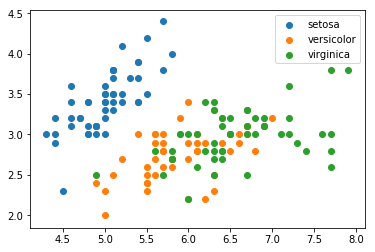

In [46]:
plt.scatter(iris.data[:50, 0], iris.data[:50, 1], label='setosa')
plt.scatter(iris.data[50:100, 0], iris.data[50:100, 1], label='versicolor')
plt.scatter(iris.data[100:, 0], iris.data[100:, 1], label='virginica')
plt.legend()
plt.show();

In [58]:
angle = -np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

In [59]:
rotated = iris.data[:, :2].dot(rotation_matrix)

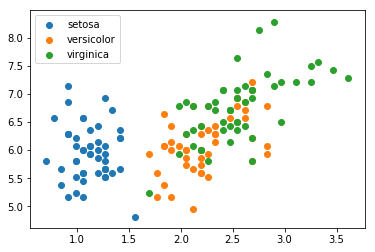

In [60]:
plt.scatter(rotated[:50, 0], rotated[:50, 1], label='setosa')
plt.scatter(rotated[50:100, 0], rotated[50:100, 1], label='versicolor')
plt.scatter(rotated[100:, 0], rotated[100:, 1], label='virginica')
plt.legend()
plt.show();

In [65]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(iris.data[:, 2:], iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
from sklearn.tree import export_graphviz

In [66]:
export_graphviz(tree_clf, out_file='iris_tree.dot', feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)